<a href="https://colab.research.google.com/github/Kerzbhy/diabetes_clustering/blob/main/diabetes_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
%matplotlib inline


In [2]:
df = pd.read_csv('/content/diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df = df.rename(columns={'Glucose':'glucose', 'BloodPressure':'blood_pressure',
'SkinThickness':'skin_thickness', 'Insulin':'insulin', 'DiabetesPedigreeFunction':'diabetes_fuction', 'Age':'age', 'Outcome':'outcome' })

In [6]:
df = df.drop('Pregnancies',axis = 1)
df = df.drop('outcome',axis = 1)


In [7]:
df.head()

,glucose,blood_pressure,skin_thickness,insulin,BMI,diabetes_fuction,age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33


In [9]:
scaler = StandardScaler()
X = scaler.fit_transform(df)
diabetes_preprocessed = pd.DataFrame(data=X, columns=df.columns)
diabetes_preprocessed.head(10)

,glucose,blood_pressure,skin_thickness,insulin,BMI,diabetes_fuction,age
0,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
5,-0.153185,0.253036,-1.288212,-0.692891,-0.811341,-0.818079,-0.275760
6,-1.342476,-0.987710,0.719086,0.071204,-0.125977,-0.676133,-0.616111
7,-0.184482,-3.572597,-1.288212,-0.692891,0.419775,-1.020427,-0.360847
8,2.381884,0.046245,1.534551,4.021922,-0.189437,-0.947944,1.681259
9,0.128489,1.390387,-1.288212,-0.692891,-4.060474,-0.724455,1.766346


In [13]:

pca = PCA(n_components=None)
dfx_pca = pca.fit(diabetes_preprocessed)
dfx_pca.explained_variance_ratio_n_components = sum(dfx_pca.explained_variance_ratio_ > 0.1)
pca = PCA(n_components=n_components)
diabetes_PCA = pca.fit_transform(diabetes_preprocessed)
print(n_components)


4


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

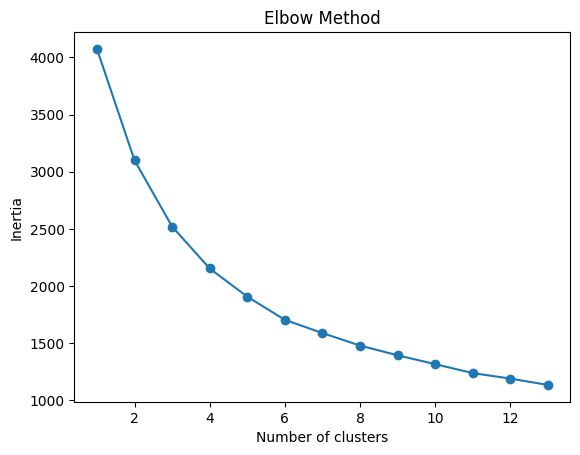

In [14]:
inertia = []
for k in range(1, 14):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(diabetes_PCA)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 14), inertia, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


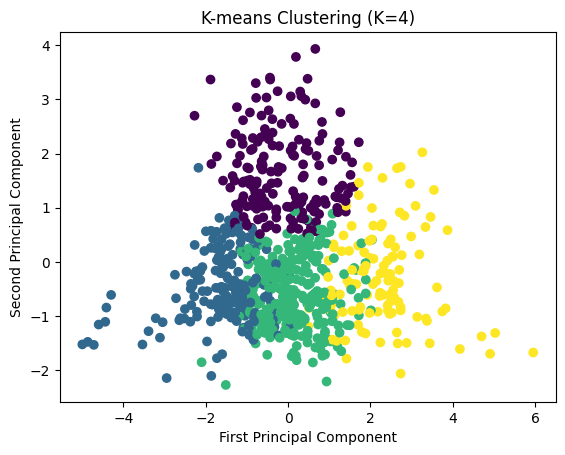

In [15]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(diabetes_PCA)
plt.scatter(diabetes_PCA[:, 0], diabetes_PCA[:, 1], c=kmeans.labels_, cmap="viridis")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title(f"K-means Clustering (K={n_clusters})")
plt.show()